In [50]:
%matplotlib inline

import pandas as pd

In [5]:
df_dh = pd.read_csv('../data/horsey.csv')
df_rc = pd.read_csv('../data/rc.csv')

In [6]:
print(df_dh.iloc[0])

round_date                                   2016-11-18
round_no                                              2
hole_no                                              13
shot_no                                               1
putt                                                NaN
completed                                          True
left_to_pin_before                                 7560
left_to_pin_after                                   360
penalty                                             NaN
player_name                                David Horsey
name                  DP World Tour Championship, Dubai
course_id                                            48
start_tee                                             1
score                                                 3
par                                                   3
yards                                               204
lie_after                                         Green
lie_before                                      

In [7]:
print(df_rc.iloc[0])

left_to_pin_before                         144
penalty                                  False
hole_no                                     14
shot_no                                      3
completed                                 True
putt                                      True
left_to_pin_after                            1
par                                          4
yards                                      448
mp_name               Friday Foursomes Match 4
usa_player1                        Matt Kuchar
usa_player2                     Dustin Johnson
eur_player1                       Lee Westwood
eur_player2                     Thomas Pieters
mp_start_time              2016-09-30 13:20:00
player_shot_name                   Matt Kuchar
shot_team                                  USA
lie_after                                 Hole
lie_before                               Green
Name: 0, dtype: object


In [8]:
df_dh.head()

,round_date,round_no,hole_no,shot_no,putt,completed,left_to_pin_before,left_to_pin_after,penalty,player_name,name,course_id,start_tee,score,par,yards,lie_after,lie_before,club,direction
0,2016-11-18,2,13,1,NaN,True,7560,360.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Green,Tee,iron,center
1,2016-11-18,2,13,2,True,True,360,12.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Green,Green,putter,short
2,2016-11-18,2,13,3,True,True,12,1.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Hole,Green,putter,center
3,2016-11-18,2,18,1,NaN,True,19440,9324.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,4,5,620,Fairway,Tee,driver,center
4,2016-11-18,2,18,2,NaN,True,9324,2520.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,4,5,620,Fairway,Fairway,iron,center


In [83]:
putts = df_dh[(df_dh.putt == True) & (df_dh.club == 'putter')].copy()

putts['made_it'] = putts['lie_after'] == 'Hole'
putts['feet_before'] = round(putts['left_to_pin_before'] / 12.0).astype(int)
putts['putts_needed'] = putts['score'] - putts['shot_no'] + 1

cols = [
    'round_no', 'hole_no', 'shot_no', 'left_to_pin_before',
    'left_to_pin_after', 'score', 'par', 'direction',
    'made_it', 'feet_before', 'putts_needed', 
]

putts = putts[cols]

putts.head(20)

,round_no,hole_no,shot_no,left_to_pin_before,left_to_pin_after,score,par,direction,made_it,feet_before,putts_needed
1,2,13,2,360,12.0,3,3,short,False,30,2
2,2,13,3,12,1.0,3,3,center,True,1,1
6,2,18,4,72,1.0,4,5,center,True,6,1
11,3,2,5,48,1.0,5,5,center,True,4,1
14,3,1,3,216,1.0,3,4,center,True,18,1
17,3,3,3,600,60.0,4,4,long right,False,50,2
18,3,3,4,60,1.0,4,4,center,True,5,1
20,3,4,2,540,72.0,3,3,long right,False,45,2
21,3,4,3,72,1.0,3,3,center,True,6,1
23,1,9,4,324,12.0,5,5,left,False,27,2


In [141]:
aggs = {
    'made_it': {
        'putts': len,
        'make': lambda x: sum(x) / len(x),
    },
    'putts_needed': {
        '1': lambda x: (x == 1).sum(),
        '2': lambda x: (x == 2).sum(),
        '3': lambda x: (x == 3).sum(),
    }
}

putt_stats = putts.groupby('feet_before').agg(aggs).reset_index()

putt_stats['fractional_par'] = putt_stats.apply(
    lambda r: sum([
        r['putts_needed'][num] / r['made_it']['putts'] * float(num)
        for num in ['1', '2', '3']
    ]),
    axis=1
)

putt_stats[:10]

feet_before made_it           putts_needed        fractional_par
                putts      make            1   2  3               
0           1     438  1.000000          438   0  0       1.000000
1           2      81  0.987654           80   1  0       1.012346
2           3      67  0.940299           63   4  0       1.059701
3           4      39  0.897436           35   3  1       1.128205
4           5      56  0.750000           42  14  0       1.250000
5           6      45  0.644444           29  15  1       1.377778
6           7      42  0.714286           30  11  1       1.309524
7           8      35  0.514286           18  17  0       1.485714
8           9      52  0.461538           24  28  0       1.538462
9          10      31  0.516129           16  15  0       1.483871

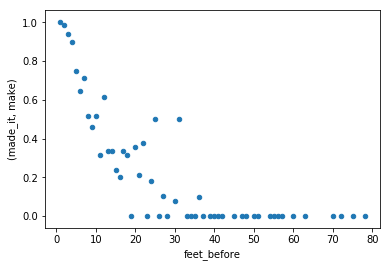

In [139]:
putt_stats.plot(kind='scatter', x='feet_before', y=('made_it', 'make'))